In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import plotly.express as px


# Load, Clean, Manipulate The Data

In [3]:
df = pd.read_csv('covid_approval_polls.csv')

In [4]:
df.head()

,start_date,end_date,pollster,sponsor,sample_size,population,party,subject,tracking,text,approve,disapprove,url
0,2020-02-02,2020-02-04,YouGov,Economist,1500.0,a,all,Trump,False,Do you approve or disapprove of Donald Trump’s...,42.0,29.0,https://d25d2506sfb94s.cloudfront.net/cumulus_...
1,2020-02-02,2020-02-04,YouGov,Economist,376.0,a,R,Trump,False,Do you approve or disapprove of Donald Trump’s...,75.0,6.0,https://d25d2506sfb94s.cloudfront.net/cumulus_...
2,2020-02-02,2020-02-04,YouGov,Economist,523.0,a,D,Trump,False,Do you approve or disapprove of Donald Trump’s...,21.0,51.0,https://d25d2506sfb94s.cloudfront.net/cumulus_...
3,2020-02-02,2020-02-04,YouGov,Economist,599.0,a,I,Trump,False,Do you approve or disapprove of Donald Trump’s...,39.0,25.0,https://d25d2506sfb94s.cloudfront.net/cumulus_...
4,2020-02-07,2020-02-09,Morning Consult,NaN,2200.0,a,all,Trump,False,Do you approve or disapprove of the job each o...,57.0,22.0,https://morningconsult.com/wp-content/uploads/...


In [5]:
df.isnull().sum()

start_date        0
end_date          0
pollster          0
sponsor        1550
sample_size      22
population        0
party             0
subject           0
tracking         16
text              2
approve           3
disapprove       15
url               0
dtype: int64

In [7]:
df['start_date'] = pd.to_datetime(df['start_date'])
df['end_date'] = pd.to_datetime(df['end_date'])

In [8]:
df.columns

Index(['start_date', 'end_date', 'pollster', 'sponsor', 'sample_size',
       'population', 'party', 'subject', 'tracking', 'text', 'approve',
       'disapprove', 'url'],
      dtype='object')

In [10]:
df = df.drop(df.columns[[3,5,8,12]],axis=1 )

In [11]:
df.columns

Index(['start_date', 'end_date', 'pollster', 'sample_size', 'party', 'subject',
       'text', 'approve', 'disapprove'],
      dtype='object')

In [14]:
df['sample_size'] = df.sample_size.fillna(0.0).astype(float)
df['approve'] = df.approve.fillna(0.0).astype(float)
df['disapprove'] = df.disapprove.fillna(0.0).astype(float)
df['text'] = df.text.fillna('NULL').astype(str)

In [15]:
df.isnull().sum()

start_date     0
end_date       0
pollster       0
sample_size    0
party          0
subject        0
text           0
approve        0
disapprove     0
dtype: int64

# Visualization

In [16]:
def find_minmax(x):
    min_index = df[x].idxmin()
    high_index = df[x].idxmax()
    high = pd.DataFrame(df.iloc[high_index,:])
    low = pd.DataFrame(df.iloc[min_index,:])
    print('with Highest ' + x + ':', df['pollster'][high_index])
    print('with Lowest ' + x + ':', df['pollster'][min_index])
    return pd.concat([high,low], axis = 1)

find_minmax('sample_size')

with Highest sample_size: SurveyMonkey
with Lowest sample_size: TIPP


,2019,338
start_date,2020-10-01 00:00:00,2020-03-29 00:00:00
end_date,2020-10-31 00:00:00,2020-04-01 00:00:00
pollster,SurveyMonkey,TIPP
sample_size,325970.0,0.0
party,all,I
subject,Trump,Trump
text,Do you approve or disapprove of the way Presid...,How would you grade his performance: HANDLING...
approve,45.0,34.0
disapprove,53.0,47.0


In [17]:
find_minmax('approve')

with Highest approve: American Research Group
with Lowest approve: Hart Research Associates


,2291,371
start_date,2021-02-17 00:00:00,2020-04-03 00:00:00
end_date,2021-02-20 00:00:00,2020-04-05 00:00:00
pollster,American Research Group,Hart Research Associates
sample_size,365.0,371.11
party,D,R
subject,Biden,Trump
text,Do you approve or disapprove of the way Joe Bi...,Do you approve or disapprove of the way Presid...
approve,98.0,0.0
disapprove,1.0,11.0


In [18]:
find_minmax('disapprove')

with Highest disapprove: SSRS
with Lowest disapprove: Research America Inc.


,1874,285
start_date,2020-10-01 00:00:00,2020-03-26 00:00:00
end_date,2020-10-04 00:00:00,2020-03-29 00:00:00
pollster,SSRS,Research America Inc.
sample_size,397.65,120.0
party,D,R
subject,Trump,Trump
text,Do you approve or disapprove of the way Donald...,How satisfied or dissatisfied are you with the...
approve,1.0,73.0
disapprove,98.0,0.0


Text(0, 0.5, 'Approve')

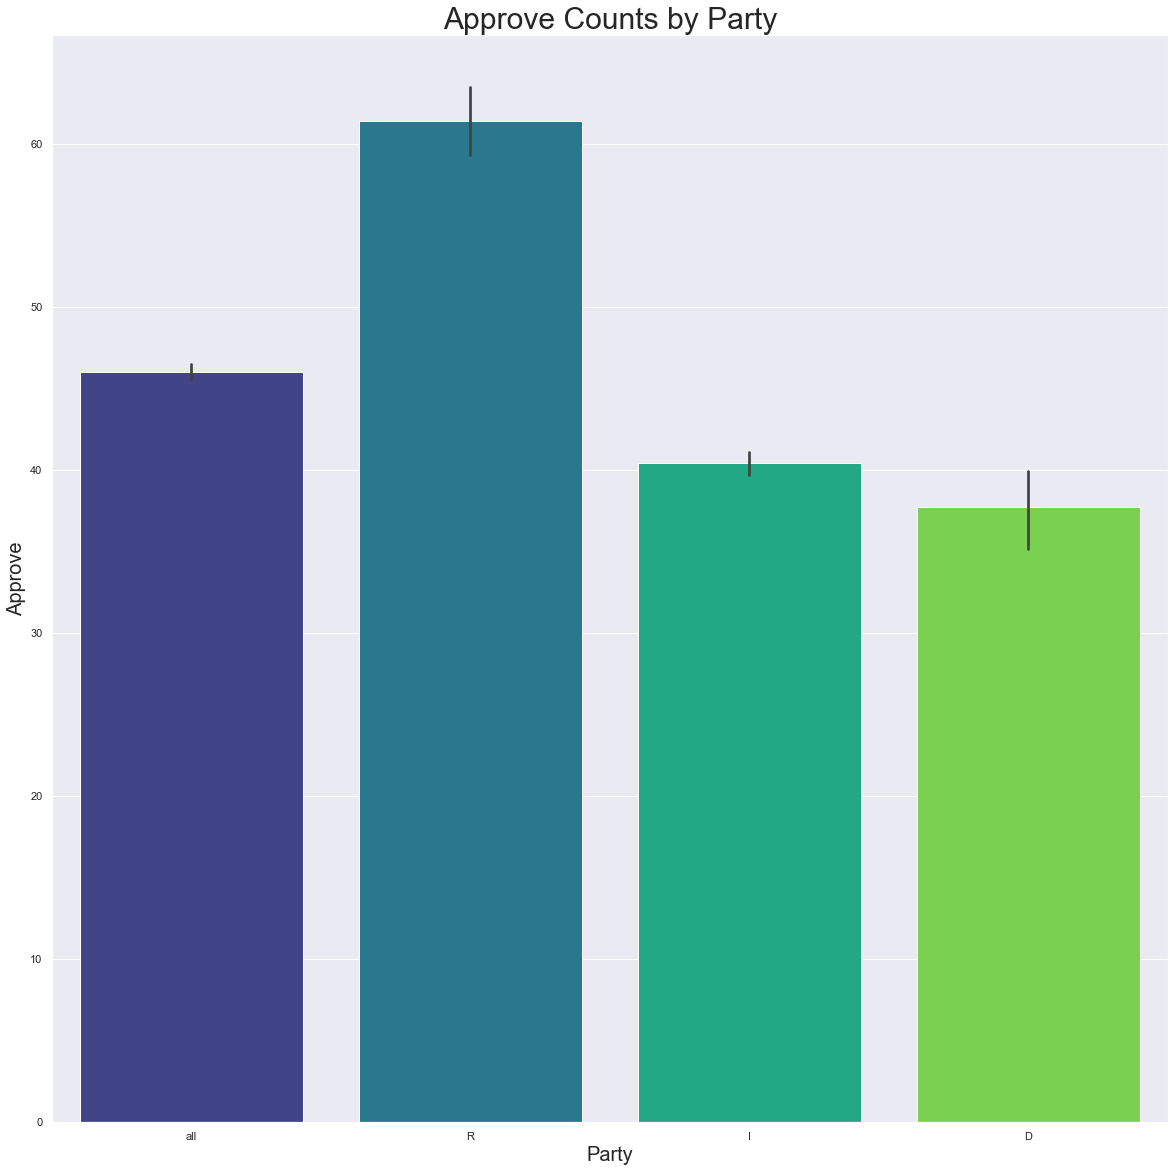

In [31]:
info = pd.DataFrame(df['party'].sort_values(ascending = False))

info['approve'] = df['approve']
data = list(map(int,(info['approve'])))
x = list(data)
y = list(info['party'])

ax = sns.barplot(x=y, y=x,saturation=1, palette='viridis')


sns.set(rc={'figure.figsize':(20,20)})
ax.set_title('Approve Counts by Party',fontsize = 30)
ax.set_xlabel('Party', fontsize = 20)
ax.set_ylabel('Approve', fontsize = 20)

Text(0, 0.5, 'Disapprove')

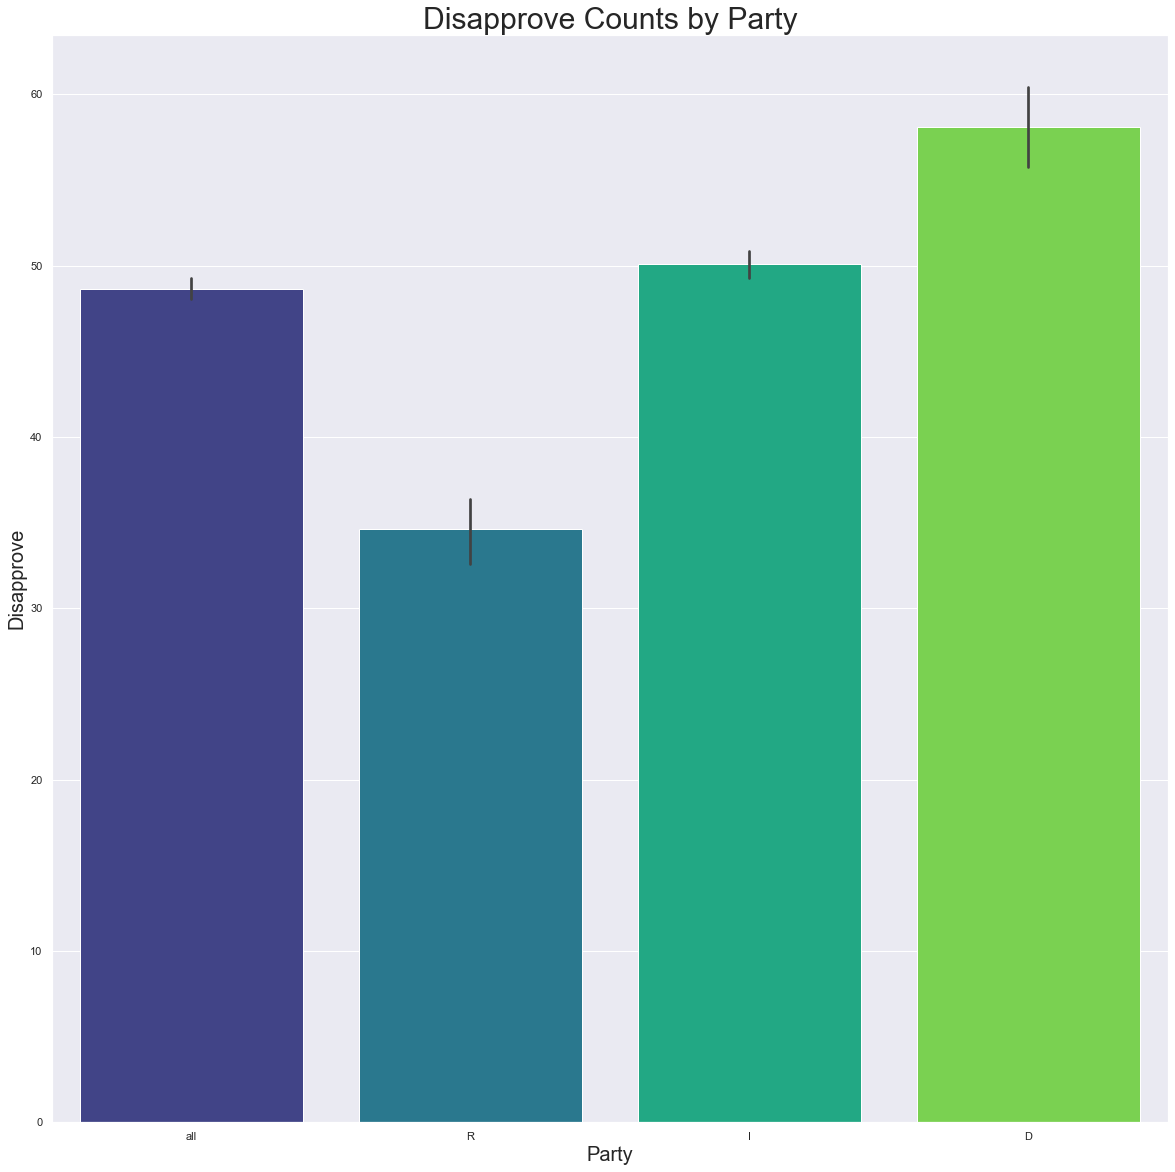

In [33]:
info = pd.DataFrame(df['party'].sort_values(ascending = False))

info['disapprove'] = df['disapprove']
data = list(map(int,(info['disapprove'])))
x = list(data)
y = list(info['party'])

ax = sns.barplot(x=y, y=x,saturation=1, palette='viridis')


sns.set(rc={'figure.figsize':(20,20)})
ax.set_title('Disapprove Counts by Party',fontsize = 30)
ax.set_xlabel('Party', fontsize = 20)
ax.set_ylabel('Disapprove', fontsize = 20)

<AxesSubplot:xlabel='sample_size', ylabel='pollster'>

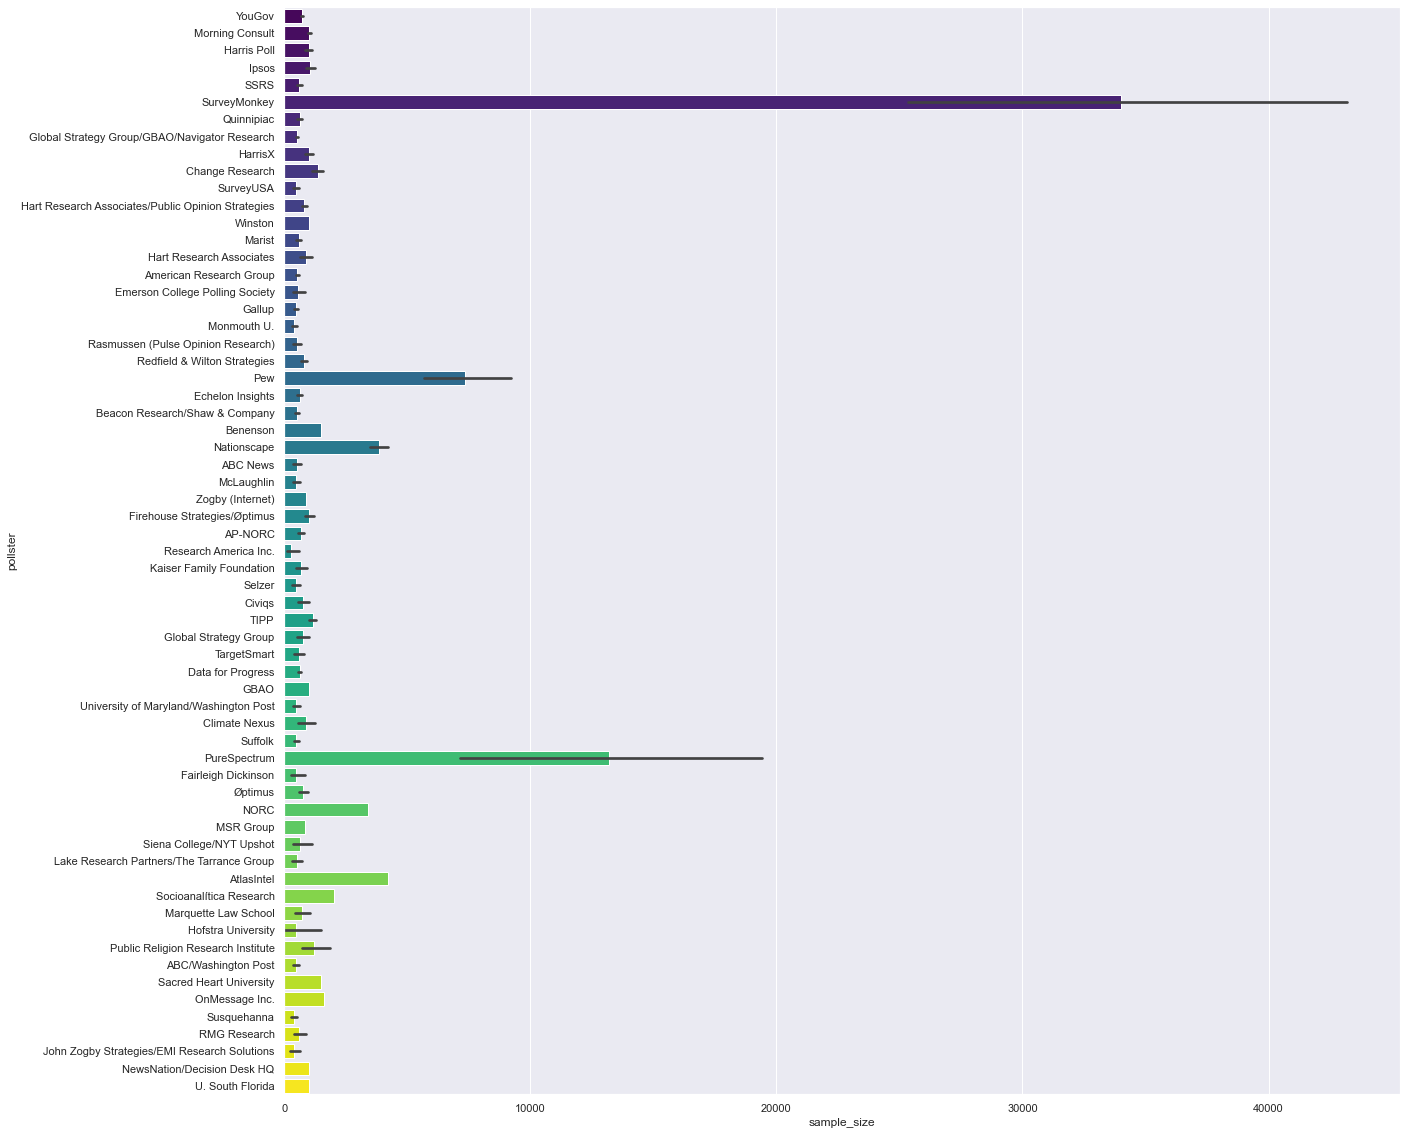

In [19]:
sns.set(rc={'figure.figsize':(20,20)})
sns.barplot(x = 'sample_size' ,y = 'pollster', data = df, saturation= 1,palette='viridis')

<AxesSubplot:xlabel='sample_size', ylabel='subject'>

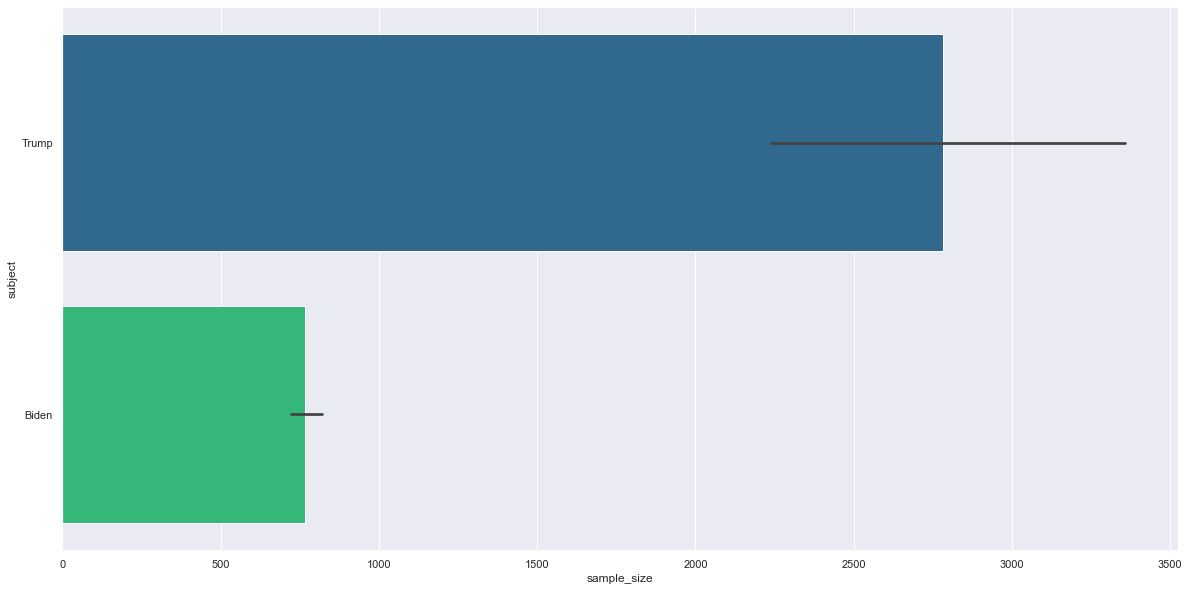

In [20]:
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(x ='sample_size', y='subject', data =df, saturation = 1, palette='viridis' )

<AxesSubplot:xlabel='approve', ylabel='subject'>

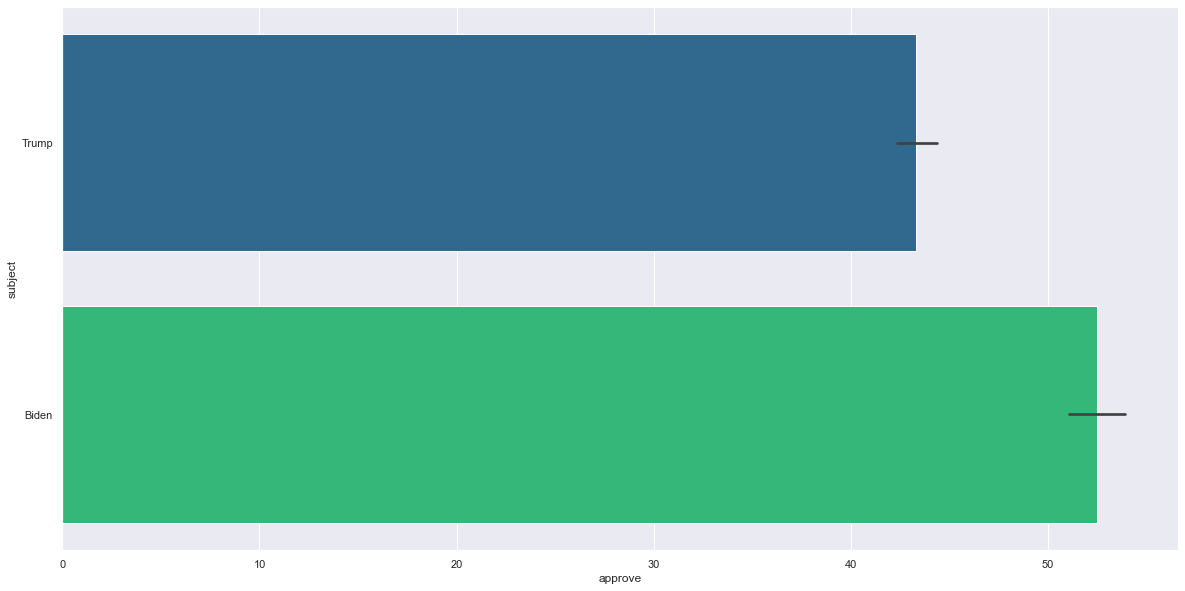

In [22]:
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(x ='approve', y='subject', data =df, saturation = 1, palette='viridis' )

<AxesSubplot:xlabel='disapprove', ylabel='subject'>

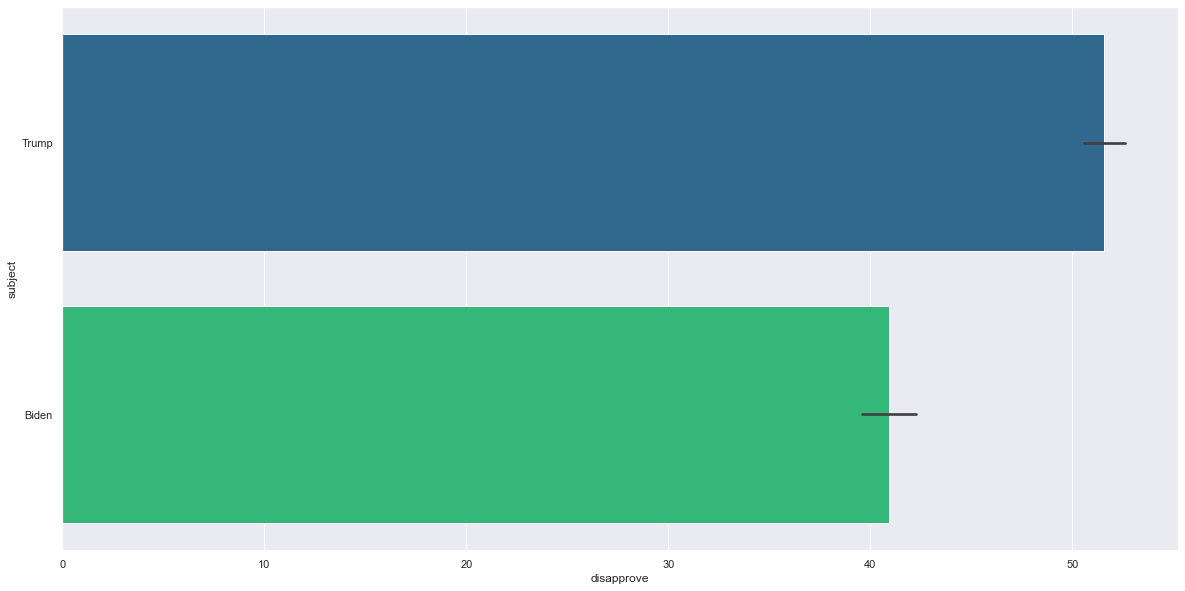

In [23]:
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(x ='disapprove', y='subject', data =df, saturation = 1, palette='viridis' )

Text(0, 0.5, 'Questions')

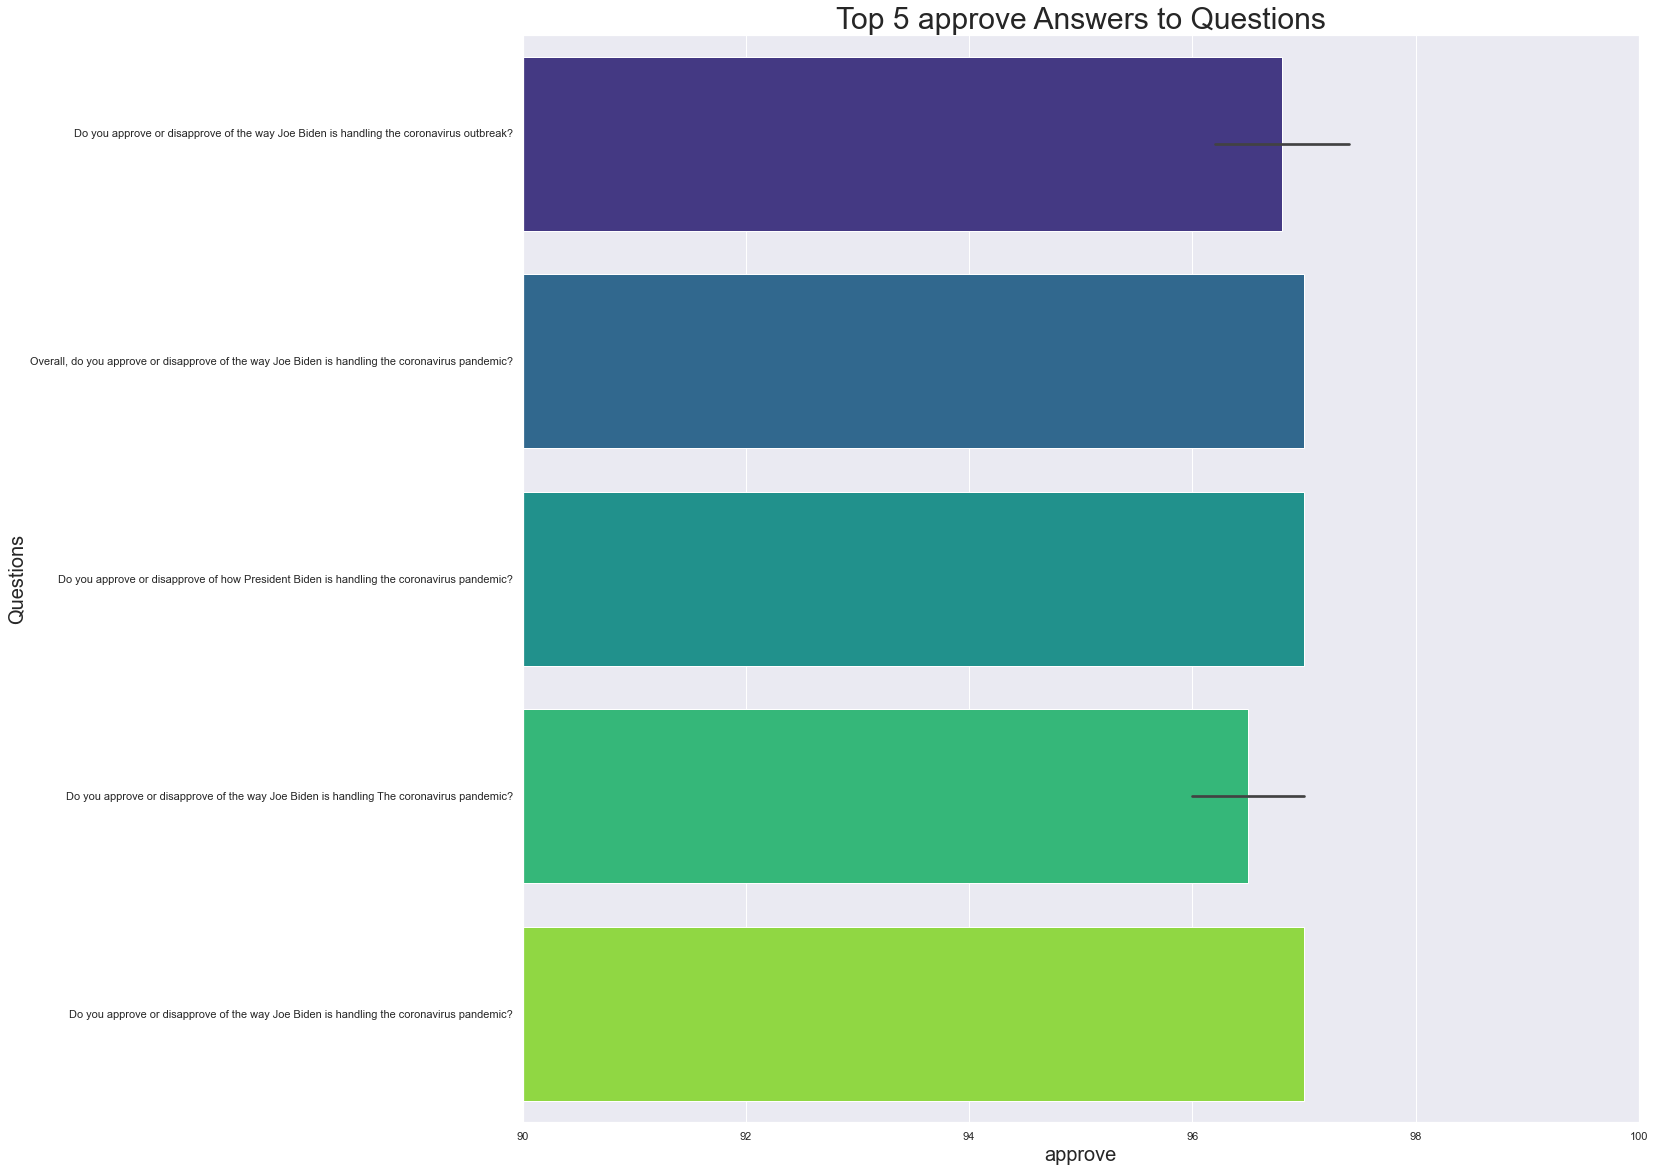

In [39]:
info = pd.DataFrame(df['approve'].sort_values(ascending = False))

info['text'] = df['text']
data = list(map(str,(info['text'])))
x = list(data[:10])
y = list(info['approve'][:10])

ax = sns.barplot(x=y, y=x,saturation=1, palette='viridis')


sns.set(rc={'figure.figsize':(20,20)})
ax.set_title('Top 5 approve Answers to Questions',fontsize = 30)
ax.set_xlabel('approve', fontsize = 20)
ax.set_xlim(90,100,1)
ax.set_ylabel('Questions', fontsize = 20)

Text(0, 0.5, 'Questions')

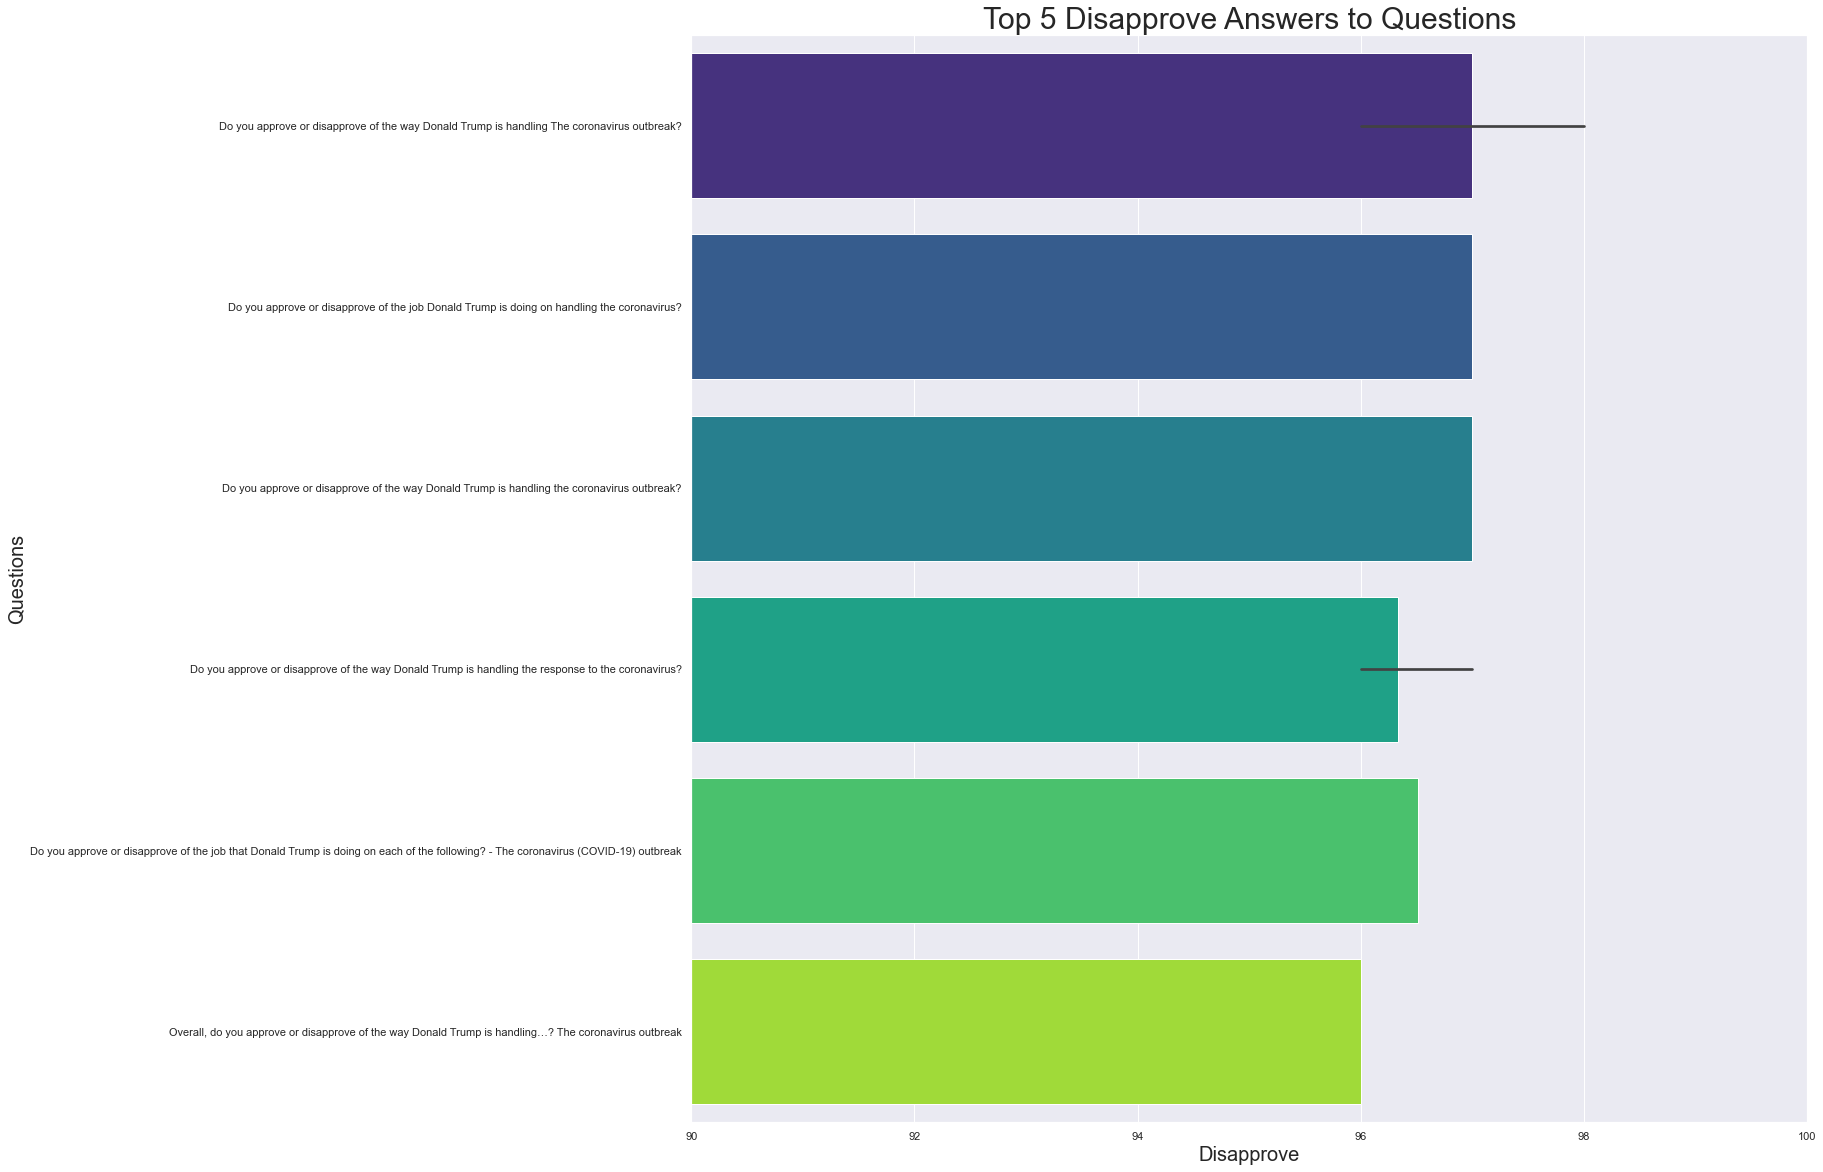

In [38]:
info = pd.DataFrame(df['disapprove'].sort_values(ascending = False))

info['text'] = df['text']
data = list(map(str,(info['text'])))
x = list(data[:10])
y = list(info['disapprove'][:10])

ax = sns.barplot(x=y, y=x,saturation=1, palette='viridis')


sns.set(rc={'figure.figsize':(20,20)})
ax.set_title('Top 5 Disapprove Answers to Questions',fontsize = 30)
ax.set_xlabel('Disapprove', fontsize = 20)
ax.set_xlim(90,100,1)
ax.set_ylabel('Questions', fontsize = 20)